In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve

try:
    df = pd.read_csv('data.csv')
except FileNotFoundError:
    print("Error: 'data.csv' not found.")
    print("Please make sure you have saved the dataset from the first prompt into a file named 'data.csv'.")
    df = pd.DataFrame()

if not df.empty:
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
    if 'Unnamed: 32' in df.columns:
        df = df.drop(columns=['id', 'Unnamed: 32'])
    else:
        df = df.drop(columns=['id'])
    X = df.drop(columns=['diagnosis'])
    y = df['diagnosis']

    print("Dataset shape:", df.shape)
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    print("\nTarget variable distribution:")
    print(y.value_counts())

Dataset shape: (569, 31)

First 5 rows of the dataset:
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nFirst 5 rows of the scaled training data:")
print(X_train_scaled.head())

Training set shape: (426, 30)
Test set shape: (143, 30)

First 5 rows of the scaled training data:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0    -0.745750     -0.221894       -0.767638  -0.699925        -0.177450   
1     1.809320     -0.478913        1.729345   1.869571        -0.107095   
2    -0.650703     -0.107404       -0.677127  -0.642862        -0.507630   
3    -0.622749     -0.270961       -0.669009  -0.616269        -0.932545   
4    -0.468997     -0.595739       -0.527762  -0.494387        -0.758399   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0         -0.814845       -0.770582            -0.718931       0.073676   
1          0.087784        0.789726             1.030298      -0.884252   
2         -0.642799       -0.766753            -0.891003      -1.022660   
3         -1.049540       -0.852846            -0.902203       0.197514   
4         -1.223101       -1.041178            -1.082090      -2.1809

In [ ]:

log_reg = LogisticRegression(random_state=42)


log_reg.fit(X_train_scaled, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


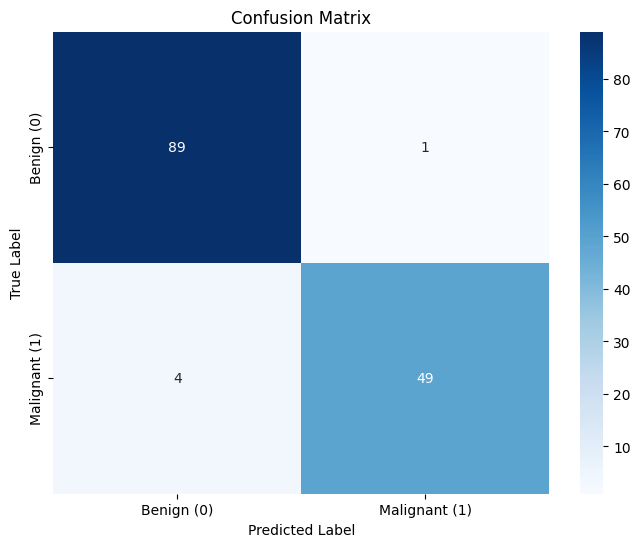

Precision: 0.9800
Recall (Sensitivity): 0.9245
ROC-AUC Score: 0.9962


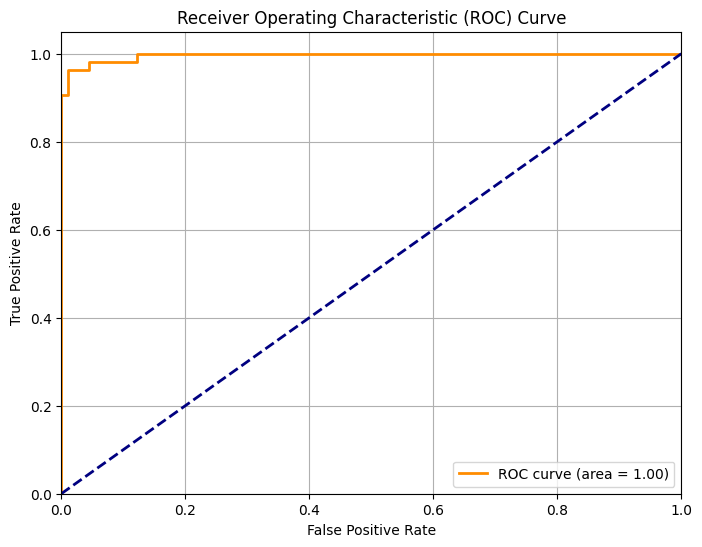

In [ ]:

y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1] # Probabilities for the positive class

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

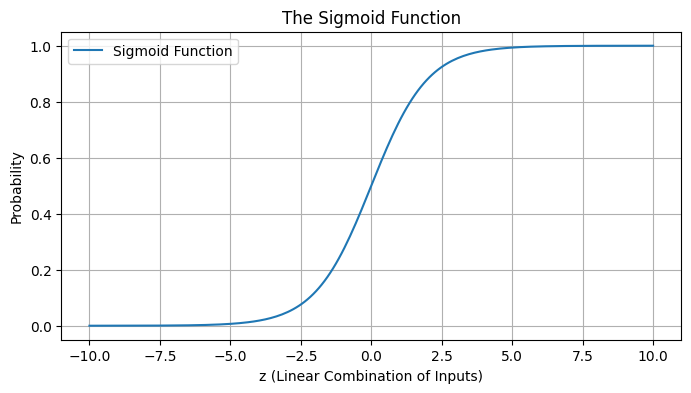


The Sigmoid Function:
The logistic regression model first computes a weighted sum of the input features (a linear combination).
The result of this sum is then passed through a sigmoid function, which squashes the output to a range between 0 and 1.
This output can be interpreted as the probability of the instance belonging to the positive class (in this case, 'Malignant').
The formula is: P(y=1) = 1 / (1 + e^(-z)), where z is the linear combination.



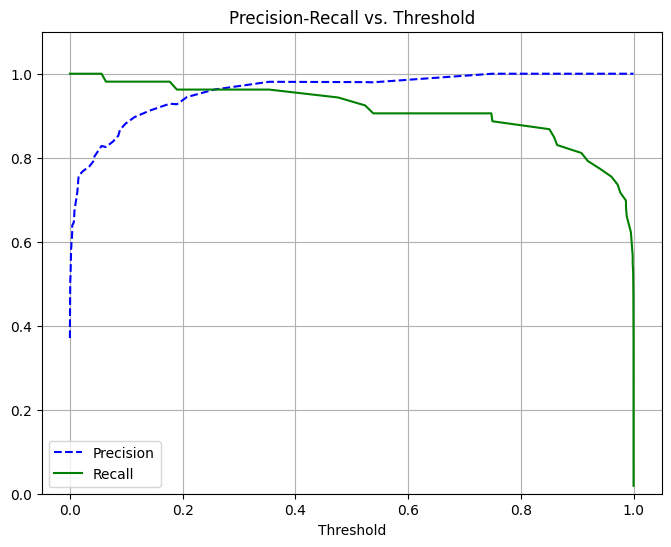


--- Evaluation with a new threshold of 0.3 ---


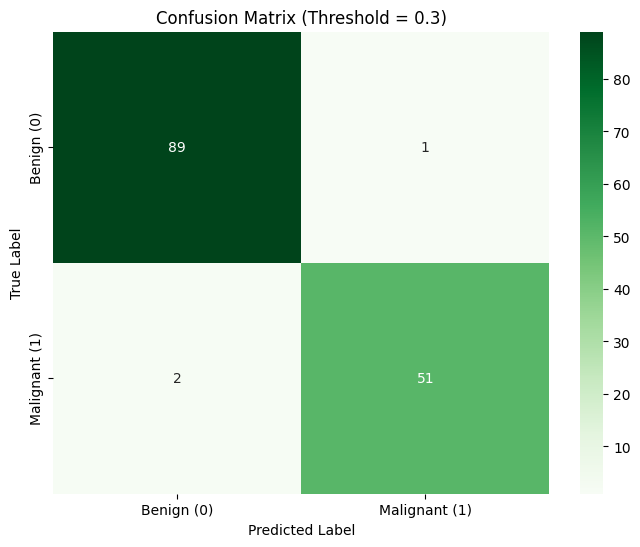

New Precision: 0.9808
New Recall: 0.9623

By lowering the threshold, we increase recall (catching more malignant cases) at the cost of lower precision (more false alarms).


In [ ]:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 200)
y_sig = sigmoid(x)

plt.figure(figsize=(8, 4))
plt.plot(x, y_sig, label='Sigmoid Function')
plt.title('The Sigmoid Function')
plt.xlabel('z (Linear Combination of Inputs)')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()

print("""
The Sigmoid Function:
The logistic regression model first computes a weighted sum of the input features (a linear combination).
The result of this sum is then passed through a sigmoid function, which squashes the output to a range between 0 and 1.
This output can be interpreted as the probability of the instance belonging to the positive class (in this case, 'Malignant').
The formula is: P(y=1) = 1 / (1 + e^(-z)), where z is the linear combination.
""")


precisions, recalls, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(thresholds_pr, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds_pr, recalls[:-1], "g-", label="Recall")
plt.title('Precision-Recall vs. Threshold')
plt.xlabel('Threshold')
plt.legend()
plt.grid(True)
plt.ylim([0, 1.1])
plt.show()

new_threshold = 0.3
y_pred_new_threshold = (y_pred_proba >= new_threshold).astype(int)

print(f"\n--- Evaluation with a new threshold of {new_threshold} ---")
cm_new = confusion_matrix(y_test, y_pred_new_threshold)
precision_new = precision_score(y_test, y_pred_new_threshold)
recall_new = recall_score(y_test, y_pred_new_threshold)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (Threshold = {new_threshold})')
plt.show()

print(f"New Precision: {precision_new:.4f}")
print(f"New Recall: {recall_new:.4f}")
print("\nBy lowering the threshold, we increase recall (catching more malignant cases) at the cost of lower precision (more false alarms).")